In [31]:
#!pip install ydata-profiling

In [32]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [33]:
df = pd.read_excel('furniture sales\Sample - Superstore-newdate.xlsx')
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
1       2  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
3       4  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [34]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [35]:
df['per_unit_price'] = df['Sales'] / df['Quantity']
df['per_unit_profit'] = df['Profit'] / df['Quantity']
df['Profit_margin'] = df['Profit'] / df['Sales']
df['Original_Price'] = df['Sales'] / (1 - df['Discount'])
df['original_per_unit_price'] = df['Original_Price'] / df['Quantity']

In [36]:
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

In [37]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
1       2  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
3       4  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...        2   
1      Claire Gute   Consumer  United States        Henderson  ...        3   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...        2   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        5   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        2   

   Discount    Profit per_unit_price per_unit_prof

In [38]:
pd.set_option('display.max_rows', None)
df['original_per_unit_price'].value_counts().sort_index(ascending=True)

0.99         2
0.99         5
0.99         3
1.14         3
1.24         5
1.26         5
1.34         1
1.39         1
1.39         2
1.48         4
1.48         3
1.60         3
1.64         4
1.64         1
1.68         1
1.68        13
1.68         5
1.74         5
1.76        23
1.76         3
1.78         3
1.80         2
1.80         7
1.80         3
1.81         3
1.81        10
1.82         1
1.82        13
1.82         2
1.84         2
1.86         4
1.88         3
1.88        13
1.88         3
1.89         6
1.95         2
1.97         1
1.97         2
1.98         6
1.98        14
2.01         8
2.04        10
2.04         1
2.08         1
2.08        14
2.08         2
2.10         3
2.15         5
2.16         5
2.16         2
2.18        25
2.19         4
2.20         3
2.21        14
2.22         4
2.23         4
2.28         3
2.33         6
2.46         1
2.46         5
2.47         4
2.48         2
2.52         5
2.58         5
2.58         1
2.60         3
2.61      

In [39]:
def analyze_and_filter_column(df, column_name):
    # Convert column to list and plot boxplot
    column_data = df[column_name].tolist()
    fig, ax = plt.subplots()
    ax.set_title(f'{column_name} Boxplot')
    ax.set_ylabel(column_name)
    ax.boxplot(column_data)
    plt.show()

    # Calculate quartiles and IQR
    quartiles = df[column_name].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Print quartile information
    print(f"The lower quartile of {column_name} is: {lowerq}")
    print(f"The upper quartile of {column_name} is: {upperq}")
    print(f"The interquartile range of {column_name} is: {iqr}")
    print(f"The median of {column_name} is: {quartiles[0.5]} ")

    # Identify potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Filter out potential outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    df_filtered = df_filtered.copy()
    # Perform quantile binning
    quantiles = [0, .25, .5, .75, 1.]
    df_filtered[f'{column_name}_binned'] = pd.qcut(df_filtered[column_name], quantiles, duplicates='drop')

    # Return the filtered and binned DataFrame
    return df_filtered

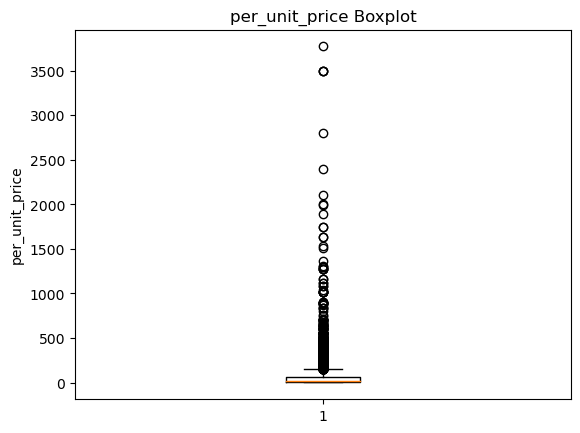

The lower quartile of per_unit_price is: 5.47
The upper quartile of per_unit_price is: 63.94
The interquartile range of per_unit_price is: 58.47
The median of per_unit_price is: 16.27 
Values below -82.235 could be outliers.
Values above 151.64499999999998 could be outliers.


In [40]:
column_name = 'per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

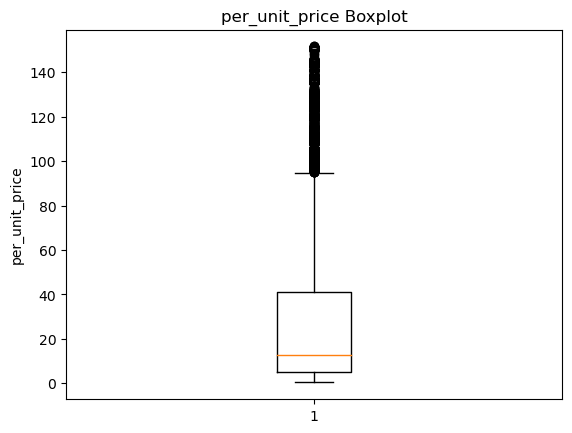

The lower quartile of per_unit_price is: 5.08
The upper quartile of per_unit_price is: 40.99
The interquartile range of per_unit_price is: 35.910000000000004
The median of per_unit_price is: 12.536000000000001 
Values below -48.78500000000001 could be outliers.
Values above 94.85500000000002 could be outliers.


In [41]:
column_name = 'per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

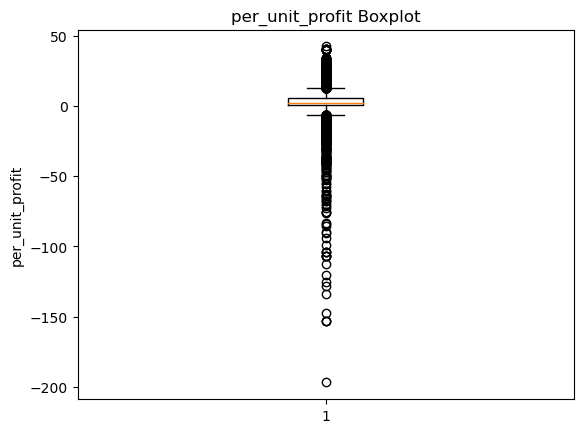

The lower quartile of per_unit_profit is: 0.7103999999999999
The upper quartile of per_unit_profit is: 5.4392
The interquartile range of per_unit_profit is: 4.7288
The median of per_unit_profit is: 2.2172 
Values below -6.3828 could be outliers.
Values above 12.532399999999999 could be outliers.


In [42]:
column_name = 'per_unit_profit'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

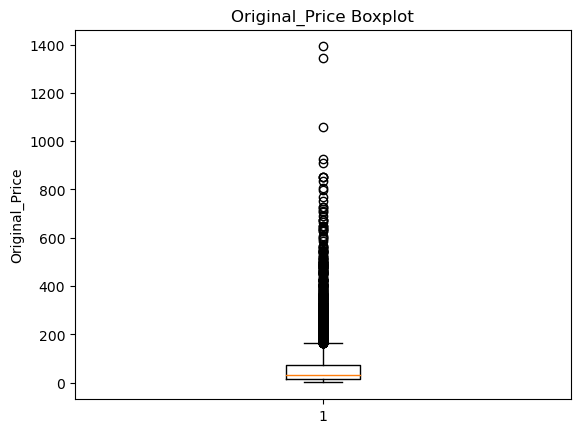

The lower quartile of Original_Price is: 14.940000000000001
The upper quartile of Original_Price is: 73.975
The interquartile range of Original_Price is: 59.035
The median of Original_Price is: 32.400000000000006 
Values below -73.6125 could be outliers.
Values above 162.52749999999997 could be outliers.


In [43]:
column_name = 'Original_Price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

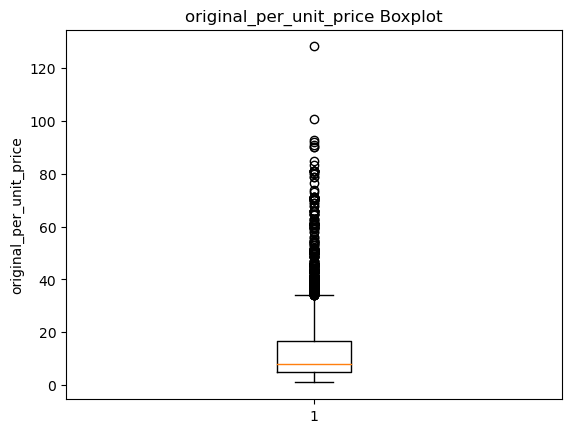

The lower quartile of original_per_unit_price is: 4.94
The upper quartile of original_per_unit_price is: 16.59
The interquartile range of original_per_unit_price is: 11.649999999999999
The median of original_per_unit_price is: 7.96 
Values below -12.534999999999997 could be outliers.
Values above 34.065 could be outliers.


In [44]:
column_name = 'original_per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

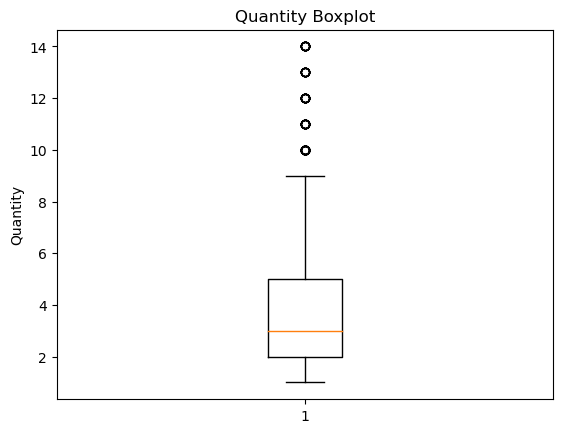

The lower quartile of Quantity is: 2.0
The upper quartile of Quantity is: 5.0
The interquartile range of Quantity is: 3.0
The median of Quantity is: 3.0 
Values below -2.5 could be outliers.
Values above 9.5 could be outliers.


In [45]:
column_name = 'Quantity'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

In [46]:
description = df.describe()
description

Row ID   Postal Code        Sales     Quantity     Discount  \
count  5651.000000   5651.000000  5651.000000  5651.000000  5651.000000   
mean   4989.270749  54968.540789    30.687879     3.603079     0.146647   
std    2873.434040  32060.263737    28.944846     1.928212     0.211704   
min       3.000000   1453.000000     0.444000     1.000000     0.000000   
25%    2519.500000  22304.000000    10.368000     2.000000     0.000000   
50%    4958.000000  55407.000000    20.320000     3.000000     0.000000   
75%    7472.500000  90004.000000    41.412000     5.000000     0.200000   
max    9993.000000  99301.000000   161.820000     9.000000     0.800000   

            Profit  per_unit_price  per_unit_profit  Profit_margin  \
count  5651.000000     5651.000000      5651.000000    5651.000000   
mean      7.941313        8.822677         2.255672       0.180779   
std      11.635358        6.968993         2.845450       0.452305   
min     -42.463800        0.336000        -6.355200      -2.750000   
25%       2.024950        3.592000         0.805600       0.162500   
50%       5.762400        6.480000         1.831600       0.325000   
75%      12.097800       12.408000         3.435700       0.440000   
max      74.852400       33.990000        12.475400       0.500000   

       Original_Price  original_per_unit_price  order_month   order_year  
count     5651.000000              5651.000000  5651.000000  5651.000000  
mean        35.890023                10.296213     7.790833  2021.729782  
std         31.814035                 7.535973     3.258828     1.121975  
min          0.990000                 0.990000     1.000000  2020.000000  
25%         12.960000                 4.820000     5.000000  2021.000000  
50%         25.020000                 7.280000     9.000000  2022.000000  
75%         48.125000                14.800000    11.000000  2023.000000  
max        162.400000                33.990000    12.000000  2023.000000

In [48]:
df.drop(columns = ["Row ID", "Order ID", "Customer ID", "City", "State", "Product Name", "Product ID", "Customer Name"])

Order Date  Ship Date       Ship Mode      Segment        Country  \
2    2022-06-11 2022-06-15    Second Class    Corporate  United States   
4    2021-10-09 2021-10-16  Standard Class     Consumer  United States   
5    2020-06-07 2020-06-12  Standard Class     Consumer  United States   
6    2020-06-07 2020-06-12  Standard Class     Consumer  United States   
8    2020-06-07 2020-06-12  Standard Class     Consumer  United States   
9    2020-06-07 2020-06-12  Standard Class     Consumer  United States   
12   2023-04-14 2023-04-19  Standard Class     Consumer  United States   
15   2021-11-20 2021-11-24  Standard Class  Home Office  United States   
17   2020-05-11 2020-05-13    Second Class     Consumer  United States   
18   2020-08-25 2020-08-30    Second Class     Consumer  United States   
20   2020-08-25 2020-08-30    Second Class     Consumer  United States   
21   2022-12-08 2022-12-12  Standard Class    Corporate  United States   
22   2022-12-08 2022-12-12  Standard Class    Corporate  United States   
25   2022-01-14 2022-01-18    Second Class     Consumer  United States   
26   2022-01-14 2022-01-18    Second Class     Consumer  United States   
28   2021-09-15 2021-09-19  Standard Class     Consumer  United States   
30   2021-09-15 2021-09-19  Standard Class     Consumer  United States   
31   2021-09-15 2021-09-19  Standard Class     Consumer  United States   
32   2021-09-15 2021-09-19  Standard Class     Consumer  United States   
33   2021-09-15 2021-09-19  Standard Class     Consumer  United States   
34   2023-10-18 2023-10-22    Second Class  Home Office  United States   
37   2021-12-25 2021-12-29  Standard Class  Home Office  United States   
44   2022-03-10 2022-03-12     First Class    Corporate  United States   
45   2022-03-10 2022-03-12     First Class    Corporate  United States   
47   2022-06-19 2022-06-24  Standard Class     Consumer  United States   
48   2022-06-19 2022-06-24  Standard Class     Consumer  United States   
49   2021-04-16 2021-04-20  Standard Class     Consumer  United States   
50   2021-04-16 2021-04-20  Standard Class     Consumer  United States   
51   2021-04-16 2021-04-20  Standard Class     Consumer  United States   
53   2022-12-10 2022-12-16  Standard Class    Corporate  United States   
56   2022-06-16 2022-06-17     First Class     Consumer  United States   
58   2022-06-16 2022-06-17     First Class     Consumer  United States   
59   2022-06-16 2022-06-17     First Class     Consumer  United States   
60   2022-06-16 2022-06-17     First Class     Consumer  United States   
61   2022-06-16 2022-06-17     First Class     Consumer  United States   
62   2021-11-22 2021-11-28  Standard Class     Consumer  United States   
63   2021-11-22 2021-11-28  Standard Class     Consumer  United States   
65   2021-11-22 2021-11-28  Standard Class     Consumer  United States   
70   2022-09-17 2022-09-22  Standard Class     Consumer  United States   
71   2023-09-13 2023-09-16    Second Class     Consumer  United States   
75   2023-12-08 2023-12-10     First Class    Corporate  United States   
76   2023-12-08 2023-12-10     First Class    Corporate  United States   
77   2023-12-08 2023-12-10     First Class    Corporate  United States   
78   2020-11-24 2020-11-29    Second Class     Consumer  United States   
80   2022-06-11 2022-06-14     First Class    Corporate  United States   
81   2020-10-10 2020-10-14  Standard Class     Consumer  United States   
82   2020-10-10 2020-10-14  Standard Class     Consumer  United States   
86   2023-10-25 2023-11-01  Standard Class     Consumer  United States   
87   2023-10-25 2023-11-01  Standard Class     Consumer  United States   
89   2022-09-16 2022-09-21  Standard Class    Corporate  United States   
91   2022-09-16 2022-09-21  Standard Class    Corporate  United States   
92   2021-01-29 2021-02-03    Second Class     Consumer  United States   
93   2021-01-29 2021-02-03    Second Class     Consumer  United States   
94   2021

In [ ]:
#To Do
#Ml choose
#Add comments
